<a href="https://colab.research.google.com/github/TaufeeqAhmed/EIP-Session1/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


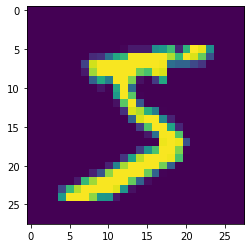

In [26]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [31]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # O/P(26,26,8), R.F(3,3), K.S(3,3,1)
model.add(Convolution2D(16, 3, 3, activation='relu')) # O/P(24,24,16), R.F(5,5),K.S(3,3,8)
model.add(Convolution2D(8, 1, 1, activation='relu')) # O/P(24,24,8), R.F(5,5),K.S(1,1,16)
model.add(MaxPooling2D(pool_size=(2, 2))) # O/P(12,12,8)
model.add(Convolution2D(16, 3, 3, activation='relu')) # O/P(10,10,16),K.S(3,3,8)
model.add(Convolution2D(32, 3, 3, activation='relu')) # O/P(8,8,32),K.S(3,3,8)
model.add(Convolution2D(64, 3, 3, activation='relu')) # O/P(6,6,64),K.S(3,3,32)
model.add(Convolution2D(10, 6)) # O/P(1,1,10),K.S(6,6,64)
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: U

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 8)         136       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        1168      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 64)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [35]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.1484 - acc: 0.9537
Epoch 2/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0501 - acc: 0.9849
Epoch 3/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0366 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0279 - acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0216 - acc: 0.9933
Epoch 6/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0178 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0150 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0135 - acc: 0.9957
Epoch 9/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0114 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 20s 342us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [42]:
print(score)

[0.037085649840203495, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [39]:
print(y_pred[:9])
print(y_test[:9])

[[2.17676666e-13 4.11634846e-15 1.26748176e-07 3.95000317e-11
  2.50185640e-17 1.74949216e-16 3.68813049e-20 9.99999881e-01
  1.69765205e-17 4.15526635e-09]
 [4.13436603e-12 4.37201967e-12 1.00000000e+00 7.50916466e-16
  3.35221164e-17 3.71309300e-18 1.52883890e-12 6.44958307e-19
  3.67574582e-11 2.29601753e-16]
 [1.02930520e-09 9.99997973e-01 7.10479000e-08 6.02364339e-11
  8.33891932e-07 2.86904562e-08 7.42256923e-09 3.83475964e-07
  5.91118351e-07 1.00765822e-08]
 [9.99998689e-01 2.04004418e-11 2.02582058e-08 3.71001617e-14
  5.05263775e-10 1.69730313e-10 9.76918272e-07 1.23429555e-09
  3.10857833e-11 3.45360576e-07]
 [1.27400477e-13 1.33968027e-14 1.28288967e-14 6.28758062e-16
  9.99999642e-01 1.58633599e-12 2.74442665e-12 3.68615567e-15
  1.55596890e-11 3.11903761e-07]
 [1.98088435e-09 9.99998093e-01 1.31257380e-07 9.22914176e-12
  8.14554710e-07 5.11331777e-09 5.38079081e-10 5.30868533e-07
  4.78630170e-07 3.00799634e-08]
 [1.02873732e-19 2.41167808e-10 1.56736950e-11 5.39493515e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

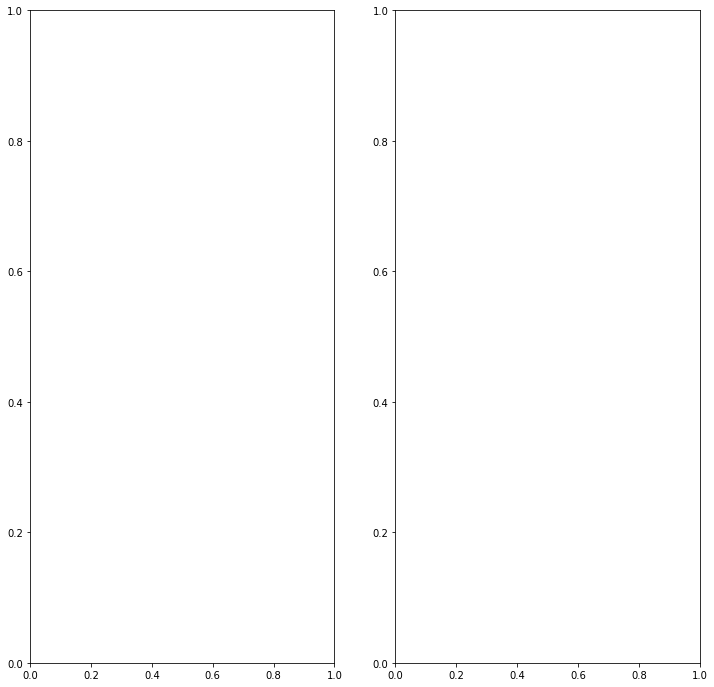

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()